<h2><font color="#004D7F" size=5>Módulo 2: Bootstrap Aggregation</font></h2>


<h1><font color="#004D7F" size=6> 7. Extra Trees</font></h1>
<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Manuel Castillo-Cara</font><br>
<font color="#004D7F" size=3>Aprendizaje Automático II</font><br>
<font color="#004D7F" size=3>Universidad Nacional de Educación a Distancia</font>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>


* [1. Algoritmo de conjunto Extra Trees](#section1)
    * [1.1. Bagging y Random Forest Vs. Extra Trees](#section11)
    * [1.2. Hiperparámetros de Extra Trees](#section12)
* [2. Extra Trees según el tipo de problema](#section2)
    * [2.1. Extra Trees para Clasificación](#section21)
    * [2.2. Extra Trees para Regresión](#section22)
* [3. Hiperparámetros de Extra Trees](#section3)
   * [3.1. Número de árboles](#section31)
   * [3.2. Número de características](#section32)
   * [3.3. Muestras mínimas por división](#section33)
* [Ejercicios](#sectionEj)

---

<a id="section0"></a>
# <font color="#004D7F">0. Contexto</font>

Extra Trees utiliza un algoritmo más simple (que Random Forest) para construir los árboles de decisión utilizados como miembros del conjunto. También es fácil de usar dado que tiene pocos hiperparámetros clave y heurísticas sensatas para configurar estos hiperparámetros.  Después de completar este tutorial, sabrá:
- Extra Trees es un conjunto de árboles de decisión y está relacionado con Bagging y Random Forest.
- Cómo utilizar el conjunto Extra Trees para clasificación y regresión con Scikit-learn.
- Cómo explorar el efecto de los hiperparámetros del modelo Extra Trees en el rendimiento del modelo.

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Algoritmo de conjunto Extra Trees</font>

Extremely Randomized Trees (Extra Trees) funciona creando una gran cantidad de árboles de decisión no podados a partir del conjunto de datos de entrenamiento. Las predicciones se realizan: 
- __Regresión__: Predicciones realizadas promediando predicciones de árboles de decisión.
- __Clasificación__: Predicciones realizadas por mayoría de votos a partir de árboles de decisión.

<figure><center>
  <img src="data/extraTrees.png" width="450" height="450" alt="Gráfica">
  <figcaption><blockquote>Extra Trees. Extraída de <a href="http://dx.doi.org/10.1080/23744731.2022.2134680">Individualized empirical baselines for evaluating the energy performance of existing buildings</a></blockquote></figcaption>
</center></figure>

<a id="section11"></a>
## <font color="#004D7F"> 1.1. Bagging y Random Forest Vs. Extra Trees</font>

- Extra Trees ajusta cada árbol de decisión en todo el conjunto de datos de entrenamiento.
- Al igual que Random Forest, Extra Trees muestreará aleatoriamente las características en cada punto de división de un árbol de decisión.
- A diferencia del bosque aleatorio, que utiliza un algoritmo Greedy para seleccionar un punto de división óptimo, el algoritmo Extra Trees selecciona un punto de división al azar.

<a id="section12"></a>
## <font color="#004D7F"> 1.2. Hiperparámetros de Random Forest</font>

Como tal, existen tres hiperparámetros principales:
1. La cantidad de árboles de decisión en el conjunto.
2. La cantidad de características de entrada para seleccionar.
3. Considerar aleatoriamente para cada punto de división y la cantidad mínima de muestras requeridas en un nodo para crear un nuevo punto de división.

La selección aleatoria de puntos de división hace que los árboles de decisión del conjunto estén menos correlacionados, aunque esto aumenta la varianza del algoritmo. 
- Este aumento en la varianza se puede contrarrestar aumentando la cantidad de árboles utilizados en el conjunto.

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section2"></a> 
# <font color="#004D7F"> 2. Extra Trees según el tipo de problema</font>

- Scikit-learn proporciona las clases `ExtraTreesRegressor` y `ExtraTreesClassifier`. 
- Ambos modelos operan de la misma manera y toman los mismos argumentos que influyen en cómo se crean los árboles de decisión. 
- La aleatoriedad se utiliza en la construcción del modelo. 
    - Esto significa que cada vez que el algoritmo se ejecuta con los mismos datos, producirá un modelo ligeramente diferente. 
    - Cuando se utilizan algoritmos de aprendizaje automático que tienen un algoritmo de aprendizaje estocástico, es una buena práctica evaluarlo promediando su rendimiento en múltiples ejecuciones o repeticiones de validación cruzada.
- uede ser deseable aumentar el número de árboles hasta que la varianza del modelo se reduzca en evaluaciones repetidas, o ajustar múltiples modelos finales y promediar sus predicciones. 

<a id="section21"></a> 
## <font color="#004D7F"> 2.1. Extra Trees para Clasificación</font>

En esta sección, veremos el uso de Extra Trees para un problema de clasificación.

<a id="section211"></a> 
### <font color="#004D7F"> 2.1.1. Dataset</font>

Primero, podemos usar la función `make_classification()` para crear un problema de clasificación binaria sintética con 1000 ejemplos y 20 características de entrada. 

In [1]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
print(X.shape, y.shape)

(1000, 20) (1000,)


<a id="section212"></a> 
### <font color="#004D7F"> 2.1.2. Evaluación</font>

Evaluaremos el modelo mediante validación cruzada estratificada repetida de _k_ veces, con 3 repeticiones y 10 pliegues. 

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la clase [`ExtraTreesClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)
</div>

In [2]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.909 (0.031)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section22"></a> 
## <font color="#004D7F"> 2.2. Extra Trees para Regresión</font>

En esta sección, veremos el uso de Extra Trees para un problema de regresión. 

<a id="section221"></a> 
### <font color="#004D7F"> 2.2.1. Dataset</font>

Primero, podemos usar la función `make_regression()` para crear un problema de regresión sintética con 1000 ejemplos y 20 características de entrada.

In [4]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=3)
print(X.shape, y.shape)

(1000, 20) (1000,)


<a id="section222"></a> 
### <font color="#004D7F"> 2.2.2. Evaluación</font>

Evaluaremos el modelo mediante validación cruzada estratificada repetida de _k_ veces, con 3 repeticiones y 10 pliegues. 

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la clase [`ExtraTreesRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html)
</div>

In [5]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -69.669 (4.913)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: La API de scikit-learn invierte el signo del MAE para transformarlo, de minimizar el error a maximizar el error negativo. Esto significa que los errores positivos de gran magnitud se convierten en grandes errores negativos (por ejemplo, 100 se convierte en -100) y un modelo perfecto no tiene ningún error con un valor de 0,0. También significa que podemos ignorar con seguridad el signo de las puntuaciones MAE medias. 

</div>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section3"></a> 
# <font color="#004D7F"> 3. Hiperparámetros de Extra Trees</font>

En esta sección, analizaremos más de cerca algunos de los hiperparámetros que debería considerar ajustar para el conjunto Extra Trees y su efecto en el rendimiento del modelo.

<a id="section31"></a> 
## <font color="#004D7F"> 3.1. Número de árboles</font>

- Normalmente, la cantidad de árboles aumenta hasta que se estabiliza el rendimiento del modelo. 
- La intuición podría sugerir que más árboles conducirán a un sobreajuste, aunque este no es el caso. 
    - Los algoritmos Bagging, Random Forest y Extra Trees parecen ser algo inmunes al sobreajuste. 
- La cantidad de árboles se puede establecer mediante el argumento `n_stimators` y el valor predeterminado es 100. 

El siguiente ejemplo explora el efecto de la cantidad de árboles con valores entre 10 y 5000.

In [9]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot

def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=4)
    return X, y

In [10]:
def get_models():
    models = dict()
    # definir el númnero de árbles
    n_trees = [10, 50, 100, 500, 1000]
    for n in n_trees:
        models[str(n)] = ExtraTreesClassifier(n_estimators=n)
    return models

In [11]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [12]:
X, y = get_dataset()

models = get_models()

results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>10 0.858 (0.033)
>50 0.897 (0.035)
>100 0.907 (0.025)
>500 0.910 (0.025)
>1000 0.912 (0.025)


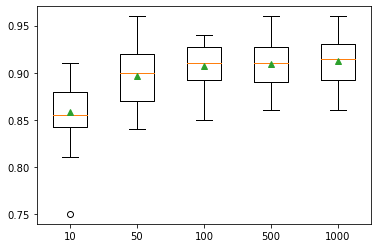

In [13]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section32"></a> 
## <font color="#004D7F"> 3.2. Número de características</font>

- La cantidad de características que se muestrean aleatoriamente para cada punto de división es quizás la característica más importante para configurar para Extra Trees. 
- Se establece mediante el argumento `max_features` y por defecto es ($\sqrt{n}$). 
    - En este caso, para nuestro conjunto de datos sintéticos, esto sería $\sqrt{20} \approx 4$. 

Probaremos con valores del 1 al 20.

In [18]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot

def get_models():
    models = dict()
    # explorar el número de características
    for i in range(2, 21):
        models[str(i)] = ExtraTreesClassifier(max_features=i)
    return models

In [19]:
X, y = get_dataset()
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>2 0.897 (0.030)
>3 0.904 (0.025)
>4 0.912 (0.026)
>5 0.905 (0.024)
>6 0.907 (0.032)
>7 0.908 (0.024)
>8 0.909 (0.022)
>9 0.905 (0.027)
>10 0.911 (0.027)
>11 0.909 (0.025)
>12 0.905 (0.025)
>13 0.907 (0.022)
>14 0.910 (0.020)
>15 0.909 (0.028)
>16 0.904 (0.024)
>17 0.906 (0.022)
>18 0.909 (0.023)
>19 0.911 (0.024)
>20 0.904 (0.026)


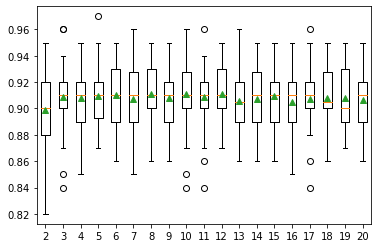

In [16]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section33"></a> 
## <font color="#004D7F"> 3.3. Muestras mínimas por división</font>

- Un último hiperparámetro interesante es el número de muestras en un nodo del árbol de decisión antes de agregar una división. 
- Solo se agregan nuevas divisiones a un árbol de decisión si el número de muestras es igual o excede este valor. 
- Se establece mediante el argumento `min_samples_split` y el valor predeterminado es 2 muestras (el valor más bajo). 
- Un número menor de muestras da como resultado más divisiones y un árbol más profundo y especializado. 
    - A su vez, esto puede significar una menor correlación entre las predicciones realizadas por los árboles del conjunto y el potencial rendimiento del incremento. 

Veamos un ejemplo con valores entre 2 y 14.

In [20]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot

def get_models():
    models = dict()
    # explorar el número de muestras entre 2 y 14
    for i in range(2, 15):
        models[str(i)] = ExtraTreesClassifier(min_samples_split=i)
    return models

In [21]:
X, y = get_dataset()
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>2 0.907 (0.027)
>3 0.909 (0.029)
>4 0.904 (0.028)
>5 0.904 (0.033)
>6 0.907 (0.027)
>7 0.898 (0.025)
>8 0.896 (0.027)
>9 0.901 (0.026)
>10 0.895 (0.026)
>11 0.892 (0.027)
>12 0.895 (0.030)
>13 0.892 (0.034)
>14 0.891 (0.030)


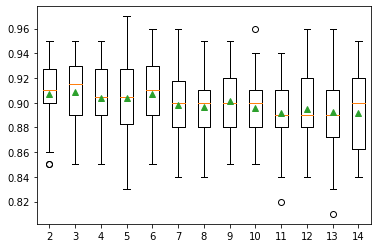

In [22]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---


<a id="sectionEj"></a>
<h3><font color="#004D7F" size=6> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicios</font></h3>

Se proponen las siguientes actividades para consolidar el aprendizaje.

# <font color="#004D7F" size=5>Ejercicio 1</font>
__Hiperparámetros__. Explore diferentes configuraciones que veas en la librería sobre Extra Trees y comente los resultados. 

# <font color="#004D7F" size=5>Ejercicio 2</font>
__Problema de Regresión__. Extra Trees se puede utilizar para un problema de regresión. Experimente con problemas de regresión.

# <font color="#004D7F" size=5>Ejercicio 3</font>
__Datasets reales__. Busque un dataset original y verdadero (que no sea sintético) y evalúe el uso de los conceptos vistos en esta unidad. Los conjuntos de datos en pueden ser obtenidos del [repositorio de aprendizaje automático de UCI](https://archive.ics.uci.edu/).

# <font color="#004D7F" size=5>Ejercicio 4</font>
__Búsqueda de la mejor configuración__. Como se ha visto existen diferentes hiperparámetros que pueden ajustar nuestro modelo. Haga una búsqueda para un dataset real de cuales, entre un rango amplio de hiperparétros, maximizan la métrica. Puede utilizar una búsqueda aleatoria.

---

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>